In [1]:
# coding: utf-8

#csv导入为dataframe的包
import pandas as pd
from pandas import Series, DataFrame
#导入时间和复制的包
import datetime,time
import copy

##解决在jupyter中画图不显示的问题
get_ipython().magic(u'matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
#解决中文编码的问题
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)
    
#解决插值的问题
from scipy import interpolate  
#统计画图，记得先安装seaborn包（cmd->conda install seaborn）
#import seaborn as sns

import this

# 一、导入数据

In [2]:
data = pd.read_csv("D:/data/Driver10Data.csv", low_memory = False)

## 1.1 查看数据属性

In [7]:
data

,Device,Trip,Time,GPS_Elevation,GPS_Fix_Quality,GPS_Hdop,GPS_Heading,GPS_Latitude,GPS_Longitude,GPS_Number_Satellites,...,LaneTrack_Probability_Left_Exist,LaneTrack_Probability_Right_Exists,LaneTrack_Shift_Aborted,LaneTrack_Shift_Left,LaneTrack_Shift_Right,LaneTrack_Shift_Successful,LaneTrack_Type_LeftLane_LeftMarker,LaneTrack_Type_LeftLane_RightMarker,LaneTrack_Type_RightLane_LeftMarker,LaneTrack_Type_RightLane_RightMarker
0,11,252030,100,239.893005,1.0,0.83,359.149994,42.306127,-83.707625,10.0,...,892.0,870.0,0,0,0,0,0.0,0.0,1.0,0.0
1,11,252030,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1024.0,883.0,0,0,0,0,0.0,0.0,1.0,0.0
2,11,252030,300,239.893005,1.0,0.83,359.329987,42.306153,-83.707626,10.0,...,1024.0,897.0,0,0,0,0,0.0,0.0,1.0,0.0
3,11,252030,400,239.893005,1.0,0.83,359.670013,42.306161,-83.707625,10.0,...,1024.0,897.0,0,0,0,0,0.0,0.0,1.0,0.0
4,11,252030,500,239.992996,1.0,0.83,359.410004,42.306173,-83.707626,10.0,...,1024.0,897.0,0,0,0,0,0.0,0.0,1.0,0.0
5,11,252030,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1024.0,909.0,0,0,0,0,0.0,0.0,1.0,0.0
6,11,252030,700,239.992996,1.0,0.83,359.630005,42.306196,-83.707626,10.0,...,1024.0,913.0,0,0,0,0,0.0,0.0,1.0,0.0
7,11,252030,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1024.0,922.0,0,0,0,0,0.0,0.0,1.0,0.0
8,11,252030,900,239.992996,1.0,0.83,359.769989,42.306219,-83.707626,10.0,...,1024.0,922.0,0,0,0,0,0.0,0.0,1.0,0.0
9,11,252030,1000,239.992996,1.0,0.83,359.470001,42.306231,-83.707626,10.0,...,1024.0,922.0,0,0,0,0,0.0,0.0,1.0,0.0


In [6]:
data.dtypes #数据维度名称及类型

Device                                    int64
Trip                                      int64
Time                                      int64
GPS_Elevation                           float64
GPS_Fix_Quality                         float64
GPS_Hdop                                float64
GPS_Heading                             float64
GPS_Latitude                            float64
GPS_Longitude                           float64
GPS_Number_Satellites                   float64
GPS_Pdop                                float64
GPS_Speed                               float64
GPS_UTC_Time                            float64
GPS_Valid                               float64
DAS_Pitch_Rate                          float64
DAS_Roll_Rate                           float64
InVehicle_ABS_State                      object
InVehicle_Brake_Status                   object
InVehicle_Headlight_Status              float64
InVehicle_Longitudinal_Accel            float64
InVehicle_Longitudinal_Speed            

In [11]:
data["Trip"].describe()#数据某一维度统计值

count    1.237396e+06
mean     9.253886e+05
std      5.499243e+05
min      2.520300e+05
25%      4.952450e+05
50%      5.198370e+05
75%      1.485855e+06
max      1.490085e+06
Name: Trip, dtype: float64

In [14]:
len(data)#数据样本点数

1237396

In [17]:
len(data.columns)#查看维度个数

45

## 1.2 数据说明 （共45个维度）

In [ ]:
'''（【】为值得注意的变量）
【】Device，车辆的标志，integer型
【】Trip，点火循环数（ignition cycles），integer型
【】Time，DAS从启动开始的工作时间，单位厘秒（10-2秒），integer数
GPS_Elevation，海拔
GPS_Fix_Quality，GPS信息质量，integer型，状态量，0-invalid，1-GPS修正，2-DGPS修正
GPS_Hdop，GPSHhop精度
GPS_Heading，GPS航向角
【】GPS_Latitude，纬度
【】GPS_Longitude，经度
GPS_Number_Satellites，GPS卫星数目
GPS_Pdop，Pdop精度
【】GPS_Speed，GPS速度
【】GPS_UTC_Time，UTC时间
GPS_Valid，GPS有效性
DAS_Pitch_Rate：车辆横轴线上的角速度，单位度/秒，Float型
DAS_Roll_Rate：车辆纵轴线上的角速度，单位度/秒，Float型
InVehicle_ABS_State：ABS状态，character型，状态量，0-不可用，1-关闭，2-开启，3-使用
InVehicle_Brake_Status：刹车状态，character型，状态量，0-未激活，1-激活
InVehicle_Headlight_Status：前大灯状态，character型，状态量，0-未激活，1-激活
【】InVehicle_Longitudinal_Accel：纵向加速度，单位m/s2，float型
【】InVehicle_Longitudinal_Speed：纵向速度,单位m/s，float型
InVehicle_PRNDL：传动系统状态，integer型，状态量，0-N空档，1-P驻车档，2-D前进档，3-R倒档，4- Reserved1,5- Reserved2,6- Reserved3,7-不可用
InVehicle_Stability_Control_Status：stability control状态，integer型，状态量，0-不可用，1-关闭，2-开启或使用
【】InVehicle_Steering_Position：方向盘位置，单位度，float型
【】InVehicle_Throttle_Position：油门位置，float型（表中都是整数）
InVehicle_Traction_Control_Status：电子系统控制牵引力状态，character型，取值有0，1，2，没有具体说明
【】InVehicle_Turn_Signal_Left：左转向灯状态，integer型，状态量，取值0，1，没有具体说明
【】InVehicle_Turn_Signal_Right：右转向灯状态，integer型，状态量，取值0，1，没有具体说明
InVehicle_Wiper_Status：雨刮器状态，0-关闭，5-开启，具体取值有0，5，6，7
InVehicle_Yaw_Rate：车辆角速度，单位度/秒，float型
LaneTrack_Crossing_Left：道路左侧有出口，bit型，取值有0，1，没有具体说明
LaneTrack_Crossing_Right：道路右侧有出口，bit型，取值有0，1，没有具体说明
LaneTrack_Distance_Left_Marker：基于机器视觉，车辆中心线到左侧车道标志的距离，单位毫米，float型，取值有负值，LaneTrack_Crossing_Left的每种取值下都有值
LaneTrack_Distance_Right_Marker：基于机器视觉，车辆中心线到右侧车道标志的距离，单位毫米，float型，取值有负值，LaneTrack_Crossing_Left的每种取值下都有值
LaneTrack_Lane_Width：最深处车道线内边缘到车辆左侧和右侧距离，float型，取值有负值
LaneTrack_Probability_Left_Exist：车辆基于机器视觉估计左侧车道线得到数据这确的概率，最大取到1024
LaneTrack_Probability_Right_Exists：车辆基于机器视觉估计右侧车道线得到数据这确的概率，最大取到1024
LaneTrack_Shift_Aborted：指示车辆变道失败，bit型，状态量，取值0，1，没有具体说明
LaneTrack_Shift_Left：指示车辆正在左变道，bit型，状态量，取值0，1，没有具体说明
LaneTrack_Shift_Right：指示车辆正在右变道，bit型，状态量，取值0，1，没有具体说明
LaneTrack_Shift_Successful：指示车辆变道成功，bit型，状态量，取值0，1，没有具体说明
LaneTrack_Type_LeftLane_LeftMarker：车辆左侧最左边的车道线类型，integer型，状态量，0-实线，1-虚线，2-不确定，3- DARK_SOLID
'''

## 1.3 各维度图形显示 

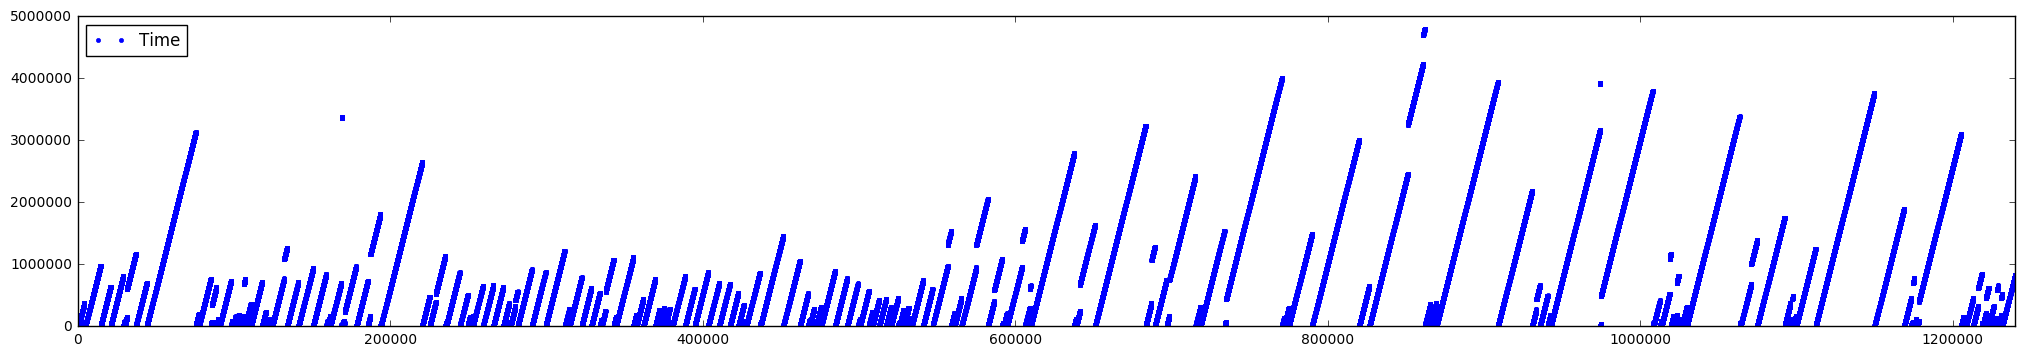

In [3]:
#time
plt.figure(figsize=(25,4))#设置图的长宽
plt.xlim(xmax=1240000)
plt.plot(data["Time"],'.')
plt.legend(loc = 'upper left')
#可从此处看出大致trip数

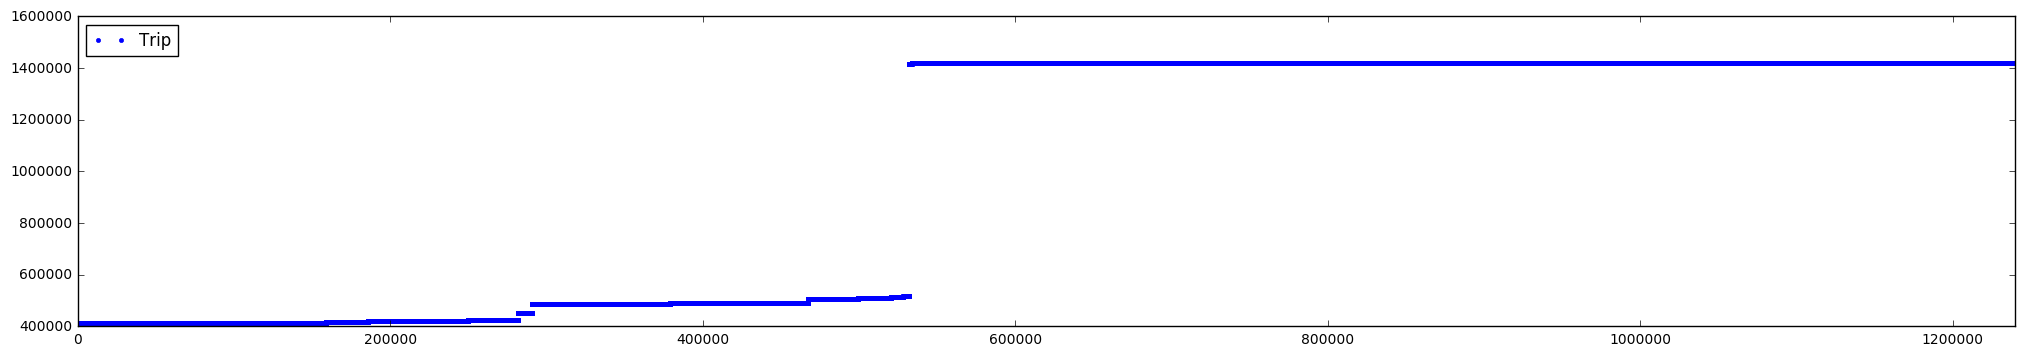

In [4]:
#time
plt.figure(figsize=(25,4))#设置图的长宽
plt.xlim(xmax=1240000)
plt.plot(data["Trip"],'.')
plt.legend(loc = 'upper left')
#可从此处看出trip编号无重复，且以一种递增的方式增长

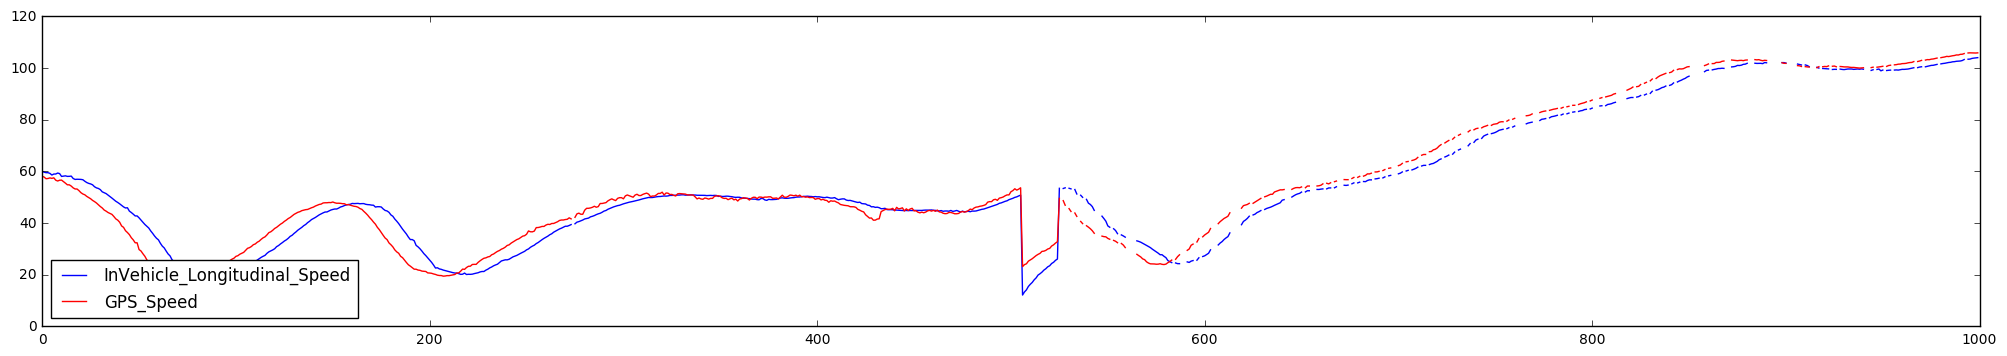

In [5]:
#GPS速度和纵向速度
plt.figure(figsize=(25,4))#设置图的长宽
plt.plot(data["InVehicle_Longitudinal_Speed"][0:1000]*3.6)
plt.plot(data["GPS_Speed"][0:1000]*3.6, 'r')
plt.legend(loc = 'lower left')
#可以看出GPS速度比纵向速度提前
#无明显噪声和异常值
#经常出现缺省值的情况，需要插值

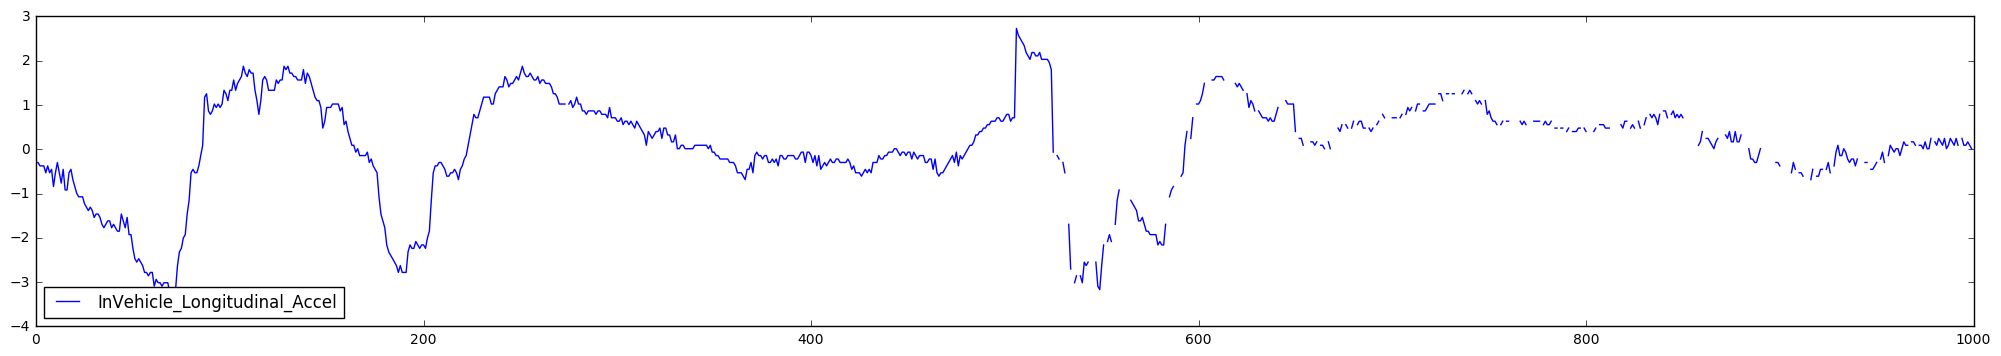

In [6]:
#纵向加速度
plt.figure(figsize=(25,4))#设置图的长宽
plt.plot(data["InVehicle_Longitudinal_Accel"][0:1000])
plt.legend(loc = 'lower left')
#可看出有毛刺，需要滤波
#需要插值

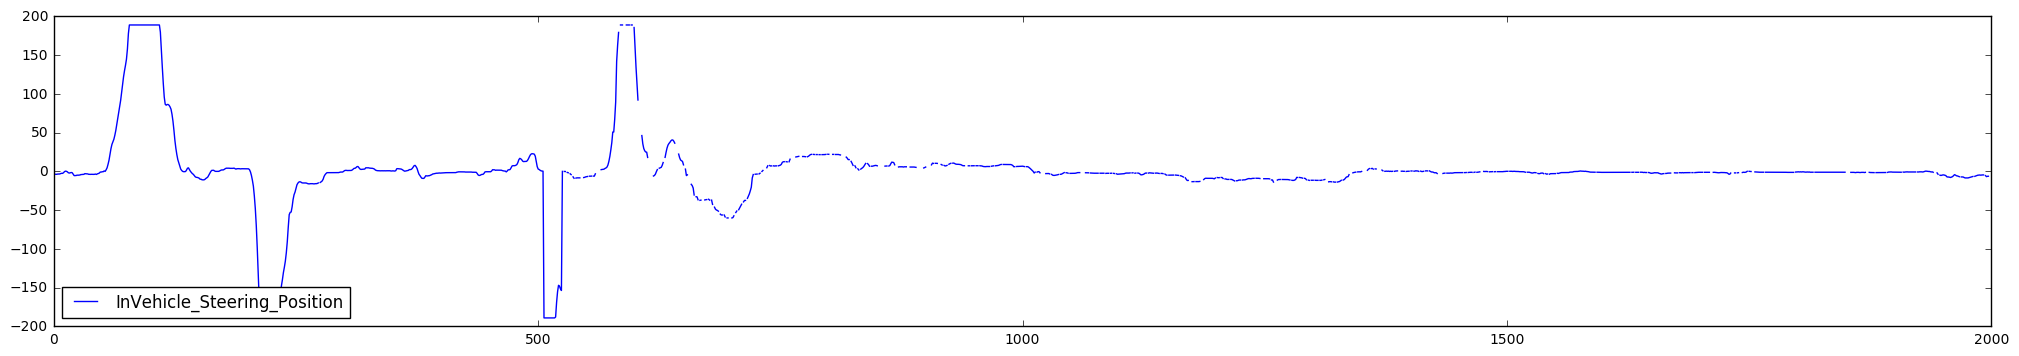

In [7]:
#方向盘转角
plt.figure(figsize=(25,4))#设置图的长宽
plt.plot(data["InVehicle_Steering_Position"][0:2000])
plt.legend(loc = 'lower left')
#需要插值

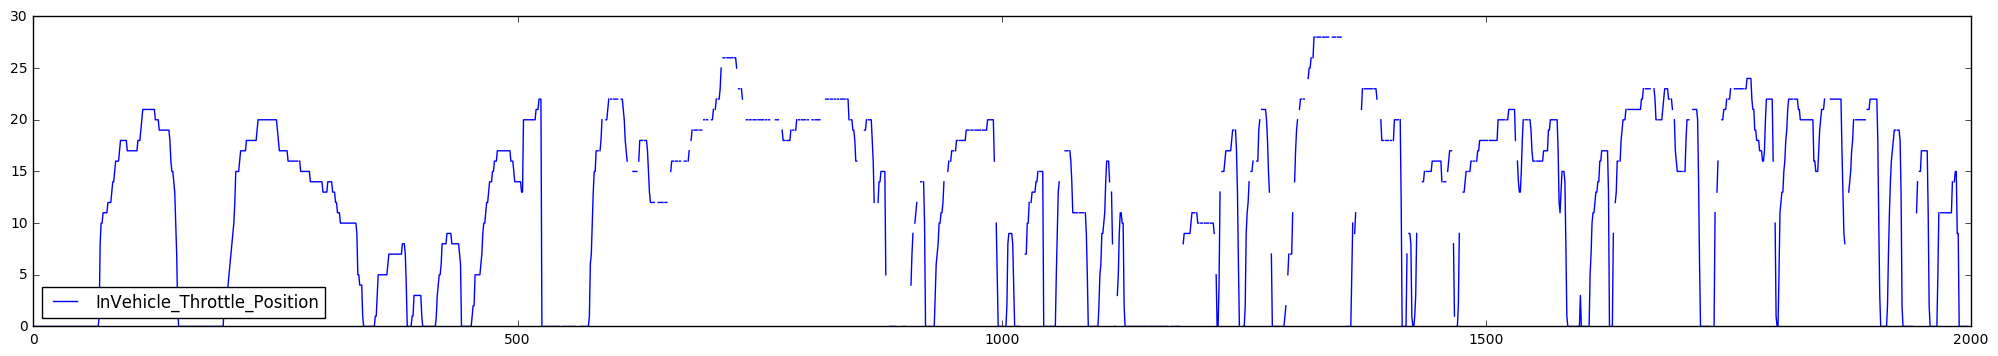

In [8]:
#节气门（油门）位置
plt.figure(figsize=(25,4))#设置图的长宽
plt.plot(data["InVehicle_Throttle_Position"][0:2000])
plt.legend(loc = 'lower left')
#大量的缺省值，这种情况可以插值否？

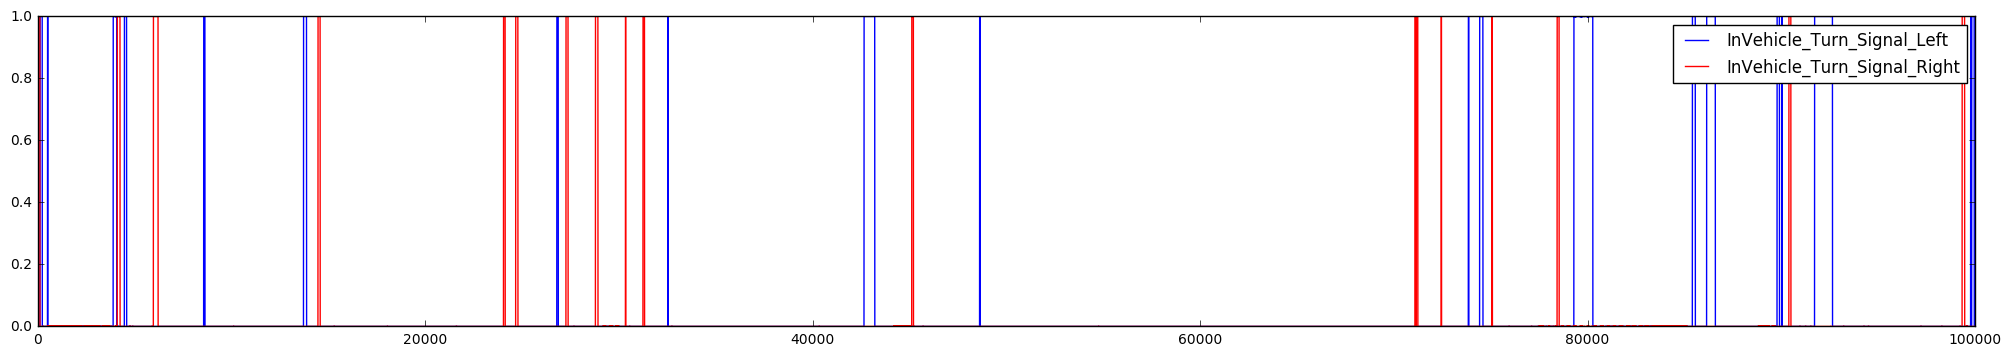

In [9]:
#左转向灯和右转向灯
plt.figure(figsize=(25,4))#设置图的长宽
plt.plot(data["InVehicle_Turn_Signal_Left"][0:100000])
plt.plot(data["InVehicle_Turn_Signal_Right"][0:100000], 'r')
plt.legend(loc = 'best')

# 二、归一化、插值、（滤波）、划分Trip

## 2.1 归一化函数

In [75]:
'''
函数名：ParaNormalization
作者：王卓文   
日期：17.4.14 
功能：将数据通过最大值最小值进行(0,1)标准化（此处未采用正太分布标准化）
输入参数：x(list形式,类型必须是float或者是double，不能是)
返回值： y（归一化后的list）
'''
def ParaNormalization(x):
    Min=np.min(x);
    Max=np.max(x);
    x = (x - Min)*1.0 / ((Max - Min)*1.0); 
    return x; 

## 2.2 插值方式判断

In [7]:
'''
【结论】
比较了各种插值方式在GPS速度、纵向速度、纵向加速度、方向盘转角，节气门五个维度数据上插值的性能优劣情况
发现，线性插值与三次插值的效果最好，三次插值有时会有凸起，
同时为了缩小运算量，我们将使用线性插值来处理数据
'''

'\n\xe3\x80\x90\xe7\xbb\x93\xe8\xae\xba\xe3\x80\x91\n\xe6\xaf\x94\xe8\xbe\x83\xe4\xba\x86\xe5\x90\x84\xe7\xa7\x8d\xe6\x8f\x92\xe5\x80\xbc\xe6\x96\xb9\xe5\xbc\x8f\xe5\x9c\xa8GPS\xe9\x80\x9f\xe5\xba\xa6\xe3\x80\x81\xe7\xba\xb5\xe5\x90\x91\xe9\x80\x9f\xe5\xba\xa6\xe3\x80\x81\xe7\xba\xb5\xe5\x90\x91\xe5\x8a\xa0\xe9\x80\x9f\xe5\xba\xa6\xe3\x80\x81\xe6\x96\xb9\xe5\x90\x91\xe7\x9b\x98\xe8\xbd\xac\xe8\xa7\x92\xef\xbc\x8c\xe8\x8a\x82\xe6\xb0\x94\xe9\x97\xa8\xe4\xba\x94\xe4\xb8\xaa\xe7\xbb\xb4\xe5\xba\xa6\xe6\x95\xb0\xe6\x8d\xae\xe4\xb8\x8a\xe6\x8f\x92\xe5\x80\xbc\xe7\x9a\x84\xe6\x80\xa7\xe8\x83\xbd\xe4\xbc\x98\xe5\x8a\xa3\xe6\x83\x85\xe5\x86\xb5\n\xe5\x8f\x91\xe7\x8e\xb0\xef\xbc\x8c\xe7\xba\xbf\xe6\x80\xa7\xe6\x8f\x92\xe5\x80\xbc\xe4\xb8\x8e\xe4\xb8\x89\xe6\xac\xa1\xe6\x8f\x92\xe5\x80\xbc\xe7\x9a\x84\xe6\x95\x88\xe6\x9e\x9c\xe6\x9c\x80\xe5\xa5\xbd\xef\xbc\x8c\xe4\xb8\x89\xe6\xac\xa1\xe6\x8f\x92\xe5\x80\xbc\xe6\x9c\x89\xe6\x97\xb6\xe4\xbc\x9a\xe6\x9c\x89\xe5\x87\xb8\xe8\xb5\xb7\xef\xbc\x8c\n\xe5

In [10]:
'''
函数名：DeleteDefaultPosition
作者：王卓文   
日期：16.12.30   
功能：删除缺省值所在的行
输入参数：data(数据框格式),para(所要查看的缺省值所在的变量，例如"速度")
返回值： data
'''
def DeleteDefaultPosition(data1,para):
    #筛除para中nan值所在的行
    where_are_nan=np.isnan(data1[para])
    dropnum=[]
                    
    for i in range(len(where_are_nan)):
        if where_are_nan[i]:
            dropnum.append(i)
    data1=data1.drop(dropnum,axis=0).reset_index(drop=True)#删掉缺省值所在的行    
    return data1

In [11]:
'''
函数名：InterpolateValue
作者：王卓文   
日期：17.4.17  
功能：往数据插值（线性、二次、三次）并绘图
输入参数：data1训练插值函数,data2需要插入的值,para需插值的维度
返回值： data
'''
def InterpolateValue(data1,data2,para):
    plt.figure(figsize=(25,4))#设置图的长宽
    data3=DeleteDefaultPosition(data1,para)#删除缺省值位置
    x=data3["Time"]
    y=data3[para]
    xnew=data2["Time"]  #注意此处需要插入的最后的值不能大于有值的位置
    pl.plot(x,y,"ro")  
  
    for kind in ["slinear","cubic","quadratic"]:
        #"nearest","zero"为阶梯插值  
        #slinear 线性插值  
        #"quadratic","cubic" 为2阶、3阶B样条曲线插值  
        f=interpolate.interp1d(x,y,kind=kind)  
        # ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)  
        ynew=f(xnew)  
        pl.plot(xnew,ynew,label=str(kind))  
    pl.legend(loc="lower right")  
    pl.show()  

In [12]:
'''
函数名：LinearInterpolation
作者：王卓文   
日期：17.4.17  
功能：往数据插值（线性、二次、三次）并绘图
输入参数：data1训练插值函数,data2需要插入的值,para需插值的维度
返回值： data
'''
def LinearInterpolation(data1,para):
    data3=DeleteDefaultPosition(data1,para)#删除缺省值位置
    x=data3["Time"]
    y=data3[para]
    xnew=data1["Time"]  #注意此处需要插入的最后的值不能大于有值的位置
    #pl.plot(x,y,"ro") 
    #线性插值
    f=interpolate.interp1d(x,y,kind="slinear")  
    ynew=f(xnew)  
    
    #pl.plot(xnew,ynew,label=str("slinear"))  
    #pl.legend(loc="lower right")  
    #pl.show()  
    return ynew

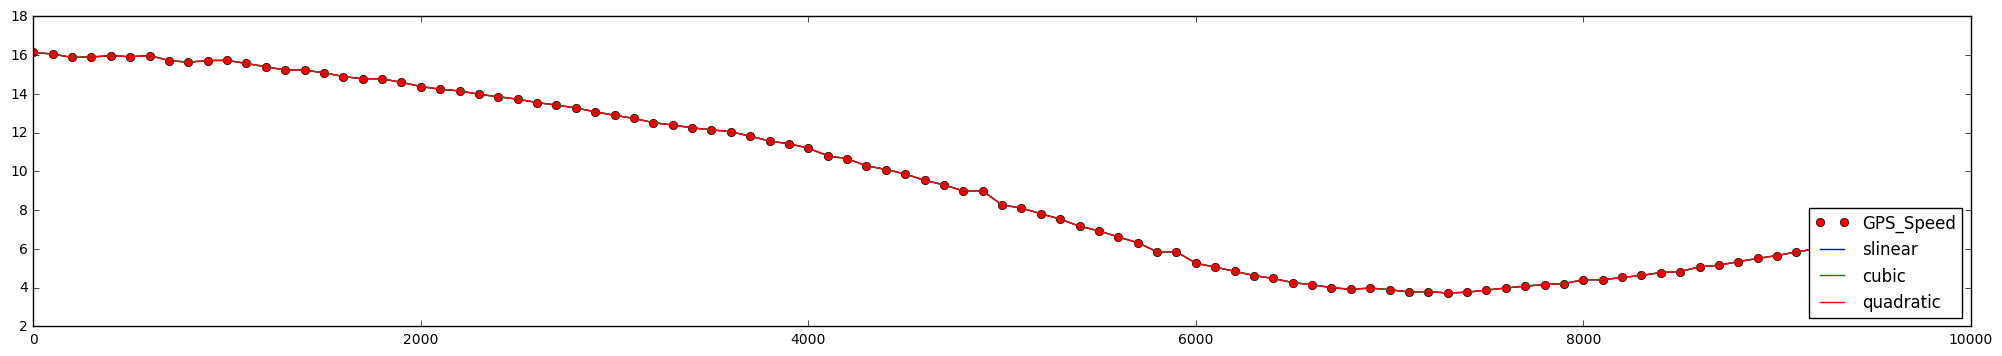

In [15]:
#对【GPS_速度】进行插值，判断哪种插值最为合适
InterpolateValue(data[0:100],data[0:99],"GPS_Speed")

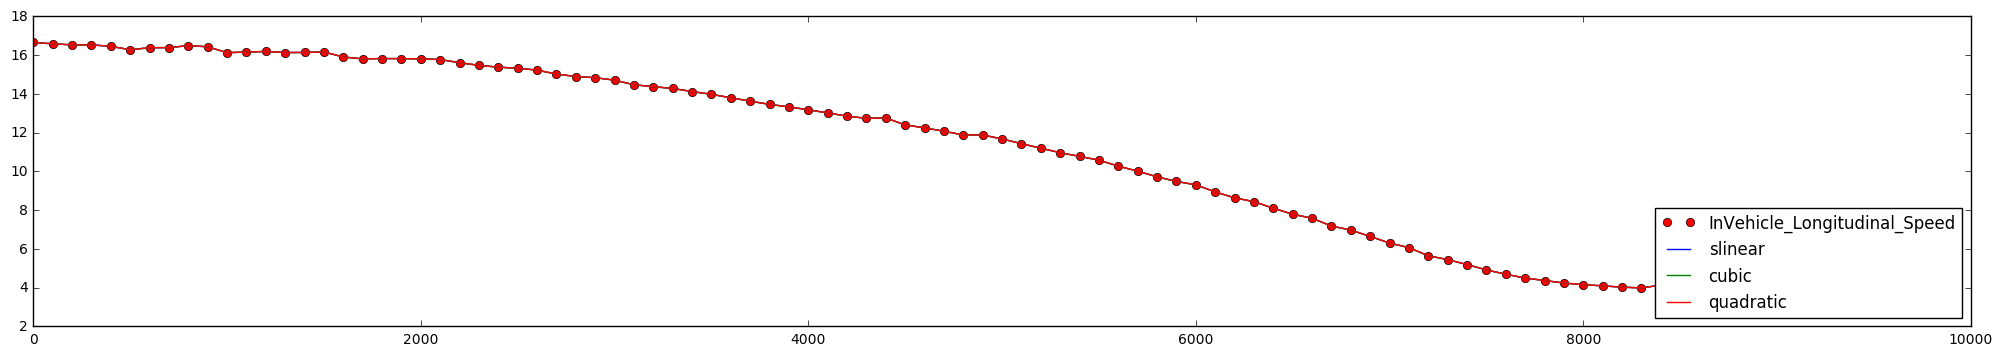

In [16]:
#对【纵向速度】进行插值，判断哪种插值最为合适
InterpolateValue(data[0:100],data[0:99],"InVehicle_Longitudinal_Speed")

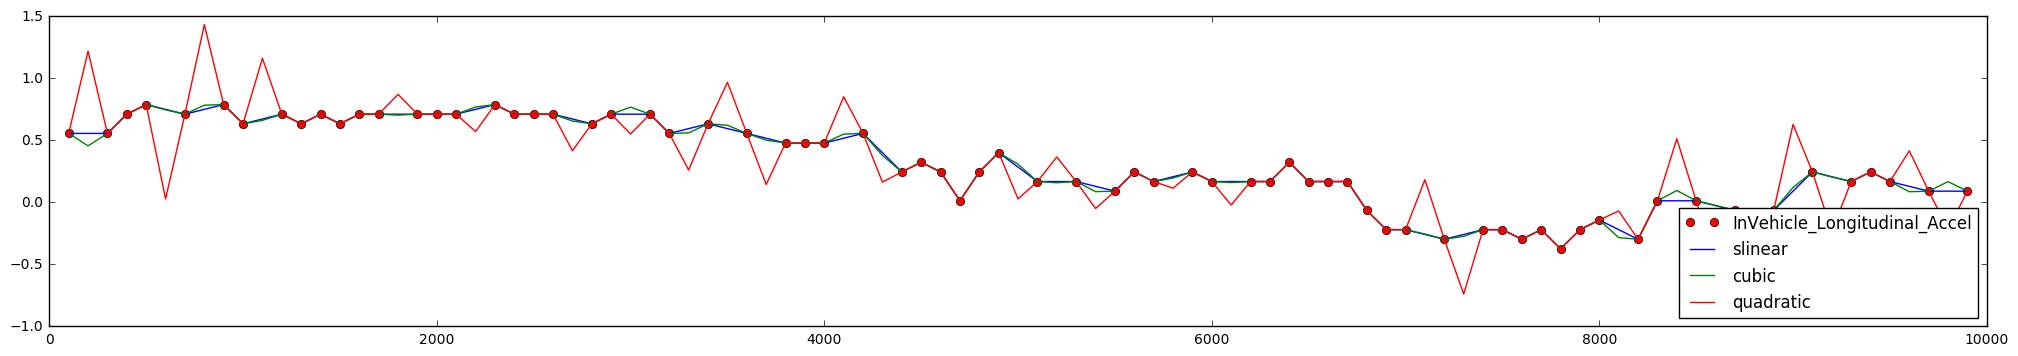

In [35]:
#对【纵向加速度】进行插值，判断哪种插值最为合适
InterpolateValue(data[0:100],data[0:99],"InVehicle_Longitudinal_Accel")

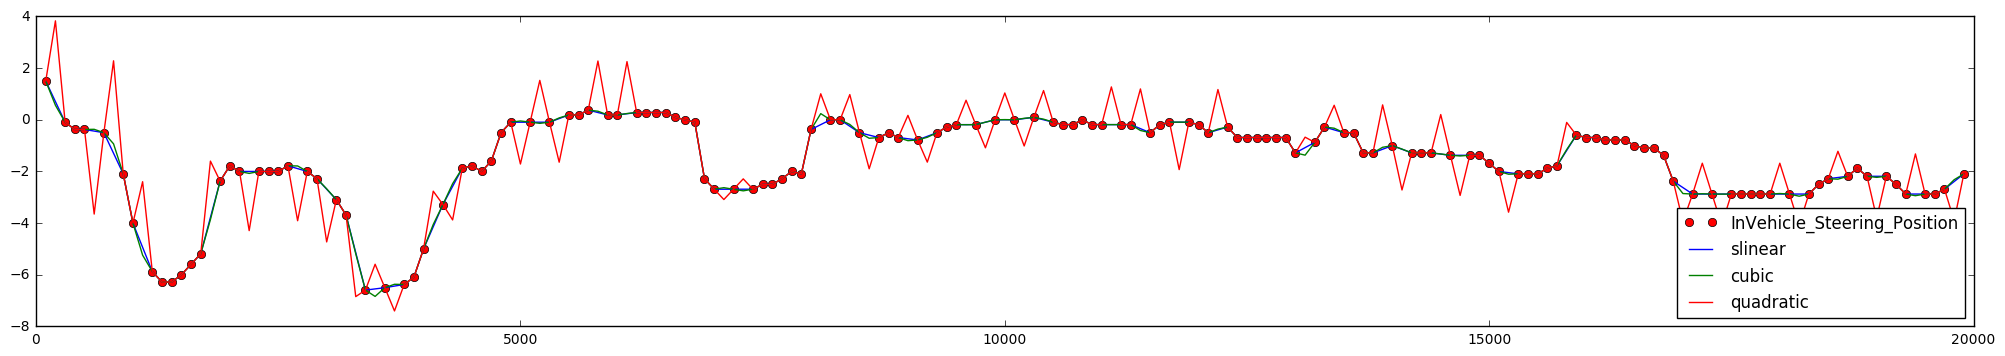

In [42]:
#对【方向盘转角】进行插值，判断哪种插值最为合适
InterpolateValue(data[0:200],data[0:199],"InVehicle_Steering_Position")

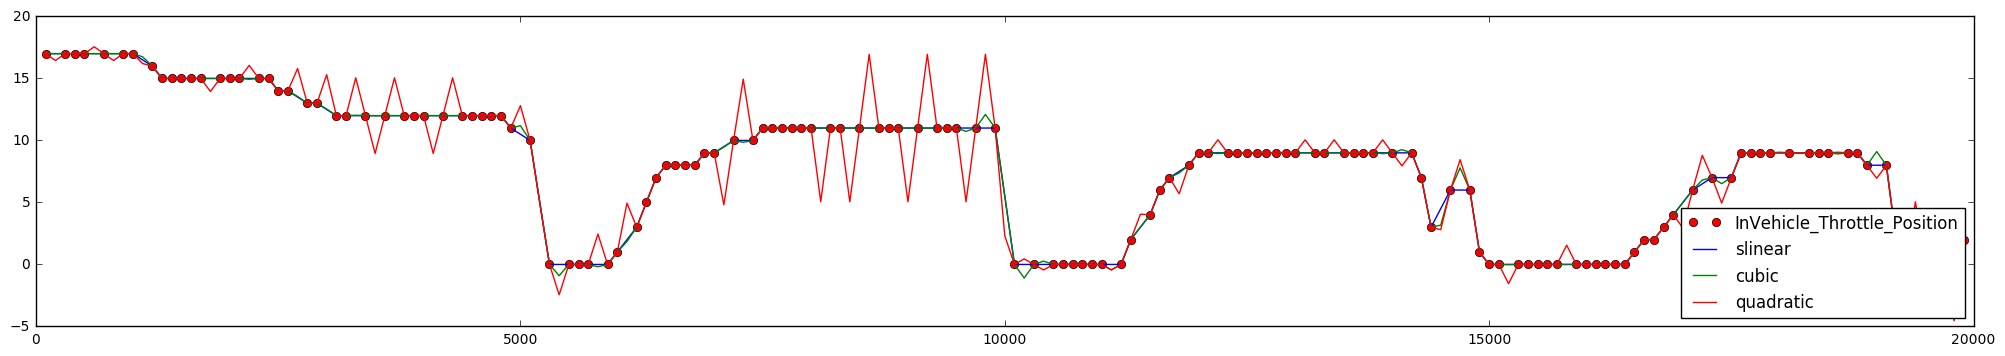

In [43]:
#对【节流阀】进行插值，判断哪种插值最为合适
InterpolateValue(data[0:200],data[0:199],"InVehicle_Throttle_Position")

## 2.3 划分trip

In [17]:
'''
函数名：GetSepTripNum
作者：王卓文   
日期：17.4.17
功能：按照Trip变量划分trip，记录trip起始点和终止点的索引号
输入参数：data(数据框格式)
返回值： triprecord（list类型）
'''
def GetSepTripNum(data): 
    trip=data["Trip"]
    tripnum=trip[0]
    triprecord=[]
    #判断trip点位置
    startnum=0
    endnum=0
    for i in range(len(trip)):
        if(tripnum==trip[i]):
            endnum=i
        else:
            triprecord.append(startnum)
            triprecord.append(endnum)
            tripnum=trip[i]
            startnum=i
            endnum=i
    triprecord.append(startnum)
    triprecord.append(len(trip)-1)
    return triprecord

In [18]:
'''
函数名：SepTrip
作者：王卓文   
日期：16.12.30   
功能：按照某一种变量（此处用速度）划分trip，生成trip的list
输入参数：data(数据框格式),para(用于划分trip的变量，例如"速度")
返回值： triplist（list类型）
'''
def SepTrip(data): 
    triplist=[]
    triprecord=GetSepTripNum(data)
    #按照triprecord划分trip并存入list
    for i in range(len(triprecord)/2):
        triplist.append(data[triprecord[2*i]:triprecord[2*i+1]].reset_index(drop=True))
    
    return triplist

In [23]:
#把data划分为不同的trip块，并存储于list中
triplist=SepTrip(data)

In [35]:
#出去数据量太少的trip
triplist2=[]
for i in range(len(triplist)):
    if(len(triplist[i])>10):
        triplist2.append(triplist[i])
triplist=triplist2
del triplist2

In [66]:
#为使插值不报错，需看每个trip最后一行，如果需插值的维度有缺省值，需删除改行

In [20]:
'''
函数名：DeleteRow
作者：王卓文   
日期：17.4.17
功能：删除dataframe中指定行
输入参数：data1(数据框格式),num(list形式)
返回值： data1
'''
def DeleteRow(data1,num):
    data1=data1.drop(num,axis=0).reset_index(drop=True)#删掉缺省值所在的行
    return data1


In [21]:
'''
函数名：SearchDefautRow
作者：王卓文   
日期：17.4.17
功能：寻找具有缺省值的行（为方便插值，只寻找开头和结尾连续的缺省值行，保留中间的具有缺省值的行）
输入参数：data1(数据框格式)
返回值： data1
'''
def SearchDefautRow(data1):
    num=[]
    m=0
    n=len(data1)-1
    while(1):
        if(np.isnan(data1.iloc[m]["GPS_Speed"]) or 
           np.isnan(data1.iloc[m]["InVehicle_Longitudinal_Speed"]) or
           np.isnan(data1.iloc[m]["InVehicle_Longitudinal_Accel"]) or
           np.isnan(data1.iloc[m]["InVehicle_Steering_Position"]) or
           np.isnan(data1.iloc[m]["InVehicle_Throttle_Position"]) or
           np.isnan(data1.iloc[m]["GPS_UTC_Time"])):
            num.append(m);
            m=m+1;
        else:
            break;    
            
    while(1):
        if(np.isnan(data1.iloc[n]["GPS_Speed"]) or 
           np.isnan(data1.iloc[n]["InVehicle_Longitudinal_Speed"]) or
           np.isnan(data1.iloc[n]["InVehicle_Longitudinal_Accel"]) or
           np.isnan(data1.iloc[n]["InVehicle_Steering_Position"]) or
           np.isnan(data1.iloc[n]["InVehicle_Throttle_Position"]) or
           np.isnan(data1.iloc[n]["GPS_UTC_Time"])):
            num.append(n);
            n=n-1;
        else:
            break;
    return num


In [36]:
#删除每个trip首行空缺和末行空缺，方便插值
for i in range(len(triplist)):
    triplist[i]=DeleteRow(triplist[i],SearchDefautRow(triplist[i]))

In [37]:
'''
函数名：GenerateTripBlock
作者：王卓文   
日期：17.4.17  
功能：按照trip将数据划分为不同的数据块，并新建数据框，分别存储设备号、Trip编号、时间、GPS速度、纵向速度、纵向加速度、方向盘转角、
     节气门位置、UTC时间，返回该数据框
输入参数：data(数据框格式),para(用于划分trip的变量，例如"速度")
返回值： df2
'''
def GenerateTripBlock(data):
    gpsspeed=LinearInterpolation(data,"GPS_Speed")
    longspeed=LinearInterpolation(data,"InVehicle_Longitudinal_Speed")
    accel=LinearInterpolation(data,"InVehicle_Longitudinal_Accel")
    steering=LinearInterpolation(data,"InVehicle_Steering_Position")
    throttle=LinearInterpolation(data,"InVehicle_Throttle_Position")
    utctime=LinearInterpolation(data,"GPS_UTC_Time")
    
    df={"Device":data["Device"],"Trip":data["Trip"],"Time":data["Time"],"GPS_Speed":gpsspeed,
        "InVehicle_Longitudinal_Speed":longspeed,"InVehicle_Longitudinal_Accel":accel,
        "InVehicle_Steering_Position":steering,"InVehicle_Throttle_Position":throttle,"GPS_UTC_Time":utctime}
    df2=pd.DataFrame(data=df)
    
    return df2

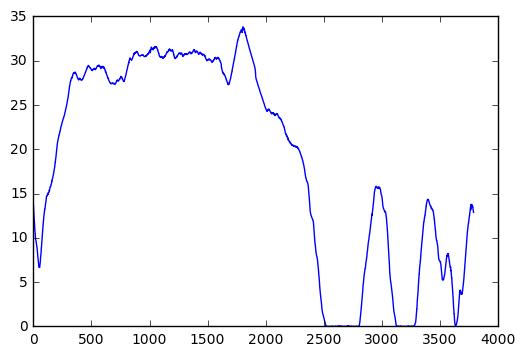

In [38]:
plt.plot(GenerateTripBlock(triplist[2])["GPS_Speed"])
#下图说明上述维度缺省点已经被插值

In [46]:
#对每个trip数据进行插值，并存储为csv
for i in range(len(triplist)):
    triplist[i]=GenerateTripBlock(triplist[i])
    addr="D:/data/driver10trip/"+str(i)+".csv"
    triplist[i].to_csv(addr,index=False)

# 三、特征选择

## 3.1 Hist统计直方图

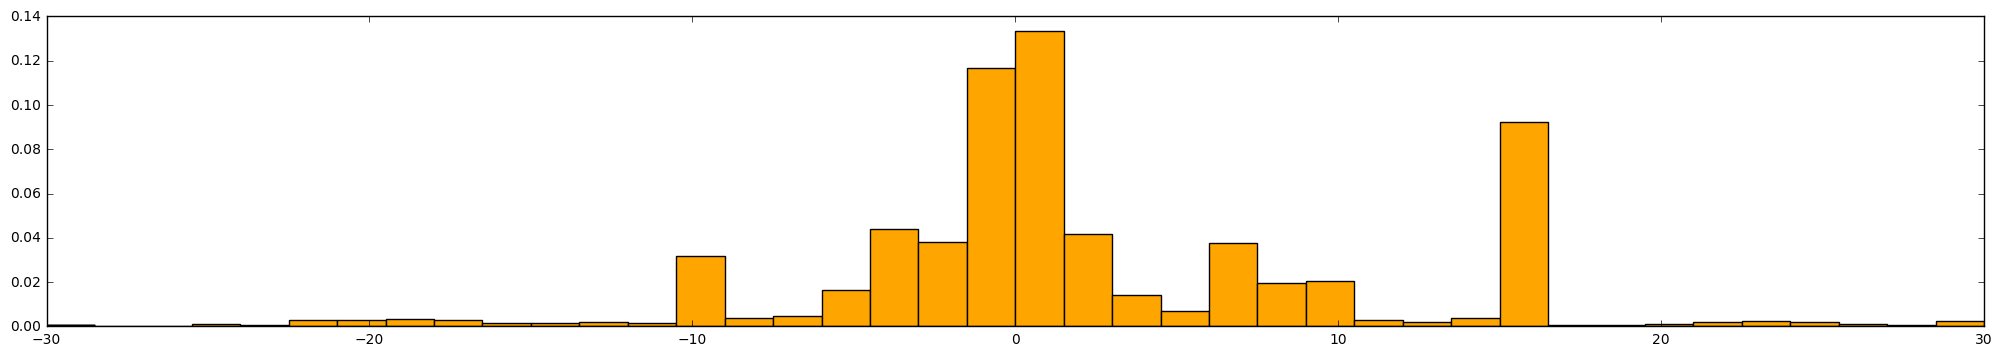

In [186]:
plt.figure(figsize=(25,4))#设置图的长宽
histvalue=plt.hist((GenerateTripBlock(triplist[13])["InVehicle_Steering_Position"]),bins=40,color='orange',normed=1,range=(-30,30))

In [217]:
#用numpy包计算直方图
hist1=np.histogram(GenerateTripBlock(triplist[10])["InVehicle_Longitudinal_Speed"], bins=40,range=(-30,30),normed=1)

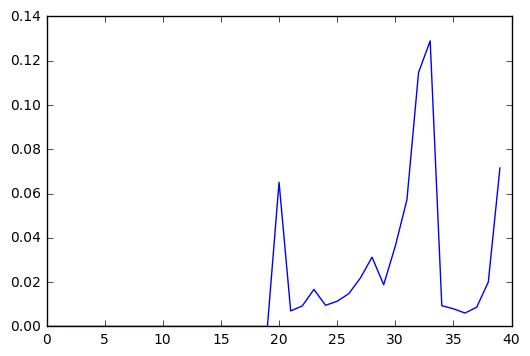

In [218]:
plt.plot(hist1[0])

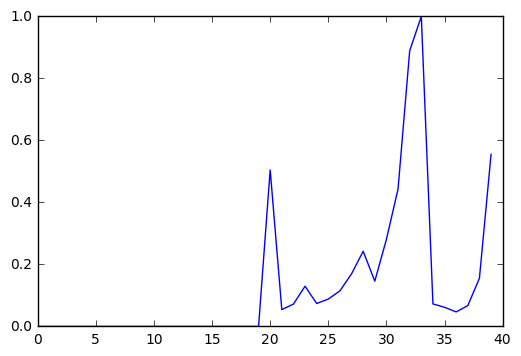

In [219]:
#显示上述数值，hist[1]代表区域分割点，hist[0]代表每个区域的统计数值
plt.plot(ParaNormalization(hist1[0]))

## 3.2  生成两个司机的加速度特征并生成有值表

In [78]:
#读取司机10的205个trip数据
driver10trip=[]
for i in range(205):
    addr="D:/data/driver10trip/"+str(i)+".csv"
    driver10trip.append(pd.read_csv(addr, low_memory = False))

In [80]:
driver10trip[10]

,Device,GPS_Speed,GPS_UTC_Time,InVehicle_Longitudinal_Accel,InVehicle_Longitudinal_Speed,InVehicle_Steering_Position,InVehicle_Throttle_Position,Time,Trip
0,10,19.676292,1.349627e+12,-0.0642,19.033333,-1.781250,15.0,0,413353
1,10,19.766736,1.349627e+12,0.4014,19.180555,-1.687500,15.0,100,413353
2,10,19.804764,1.349627e+12,0.2850,19.177777,-1.390625,15.0,200,413353
3,10,19.842792,1.349627e+12,0.1686,19.174999,-1.093750,15.0,300,413353
4,10,19.851528,1.349627e+12,0.1298,19.183333,-1.046875,14.0,400,413353
5,10,19.860264,1.349627e+12,0.0910,19.191668,-1.000000,13.0,500,413353
6,10,19.951736,1.349627e+12,-0.0642,19.269444,-1.000000,13.0,600,413353
7,10,19.995417,1.349627e+12,0.0910,19.352777,-1.187500,13.0,700,413353
8,10,19.991305,1.349627e+12,0.0522,19.370833,-1.140625,13.0,800,413353
9,10,19.987194,1.349627e+12,0.0134,19.388889,-1.093750,13.0,900,413353


In [81]:
#读取司机11的234个trip数据
driver11trip=[]
for i in range(234):
    addr="D:/data/driver11trip/"+str(i)+".csv"
    driver11trip.append(pd.read_csv(addr, low_memory = False))

In [83]:
len(driver11trip)

234

In [237]:
#读取两个司机trip的特征
accelhist=[]
for i in range(len(driver10trip)):
    hist1=np.histogram(GenerateTripBlock(driver10trip[i])["InVehicle_Longitudinal_Accel"], bins=40,range=(-3.5,3.5),normed=1)[0]
    hist2=np.histogram(GenerateTripBlock(driver10trip[i])["InVehicle_Longitudinal_Speed"], bins=40,range=(1,26),normed=1)[0]
    hist3=np.histogram(GenerateTripBlock(driver10trip[i])["InVehicle_Steering_Position"], bins=40,range=(-30,30),normed=1)[0]
    accelhist.append(np.append(np.append(hist1,hist2),hist3))#ndarray拼接
for i in range(len(driver11trip)):
    hist1=np.histogram(GenerateTripBlock(driver11trip[i])["InVehicle_Longitudinal_Accel"], bins=40,range=(-3.5,3.5),normed=1)[0]
    hist2=np.histogram(GenerateTripBlock(driver11trip[i])["InVehicle_Longitudinal_Speed"], bins=40,range=(1,26),normed=1)[0]
    hist3=np.histogram(GenerateTripBlock(driver11trip[i])["InVehicle_Steering_Position"], bins=40,range=(-30,30),normed=1)[0]
    accelhist.append(np.append(np.append(hist1,hist2),hist3))   

In [242]:
len(featurename)

120

In [241]:
featurename=[]
for i in range(len(hist1)):
    feature="accel"+str(i)
    featurename.append(feature)
for i in range(len(hist2)):
    feature="speed"+str(i)
    featurename.append(feature)
for i in range(len(hist3)):
    feature="steering"+str(i)
    featurename.append(feature)

In [243]:
import csv
csvfile = file('D:/data/featurecount.csv', 'wb')
writer = csv.writer(csvfile)
writer.writerow(featurename)
data = accelhist
writer.writerows(data)
csvfile.close()

In [255]:
data = pd.read_csv('D:/data/featurecount.csv', low_memory = False)

In [254]:
DeviceCol=[]
for i in range(204):
    DeviceCol.append("10")
for i in range(233):
    DeviceCol.append("11")
data["Device"]=DeviceCol

In [120]:
data.to_csv('D:/data/featurecount.csv',index=False)

In [123]:
data.iloc()

# 四、模型拟合

In [264]:
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

ImportError: cannot import name MLPClassifier

## 4.1 SVC

In [256]:
clf =svm.SVC(kernel='rbf', gamma=0.9, C=1)# RandomForestClassifier(n_estimators=400)
scores=cross_validation.cross_val_score(clf,data,DeviceCol,cv=5)

In [257]:
scores
np.mean(scores)

0.61713749362105408

## 4.2 RandomForest

In [258]:
clf =RandomForestClassifier(n_estimators=400)
scores=cross_validation.cross_val_score(clf,data,DeviceCol,cv=5)

In [261]:
scores
np.mean(scores)

0.72670287477825568

## 4.3 ANN

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
scores=cross_validation.cross_val_score(clf,data,DeviceCol,cv=5)

## 4.4 逻辑回归

In [262]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1, penalty='l1', tol=0.01)
scores=cross_validation.cross_val_score(clf,data,DeviceCol,cv=5)

In [263]:
scores
np.mean(scores)

0.58283516803965874